# PCA

Principal Component Analysis (PCA) offers an effective way to reduce the dimensions of the data. This reduction of data allows for improved training speeds for machine learning and easier visualization of the data.

Since the number of dimensions are reduced, some information will be lost. However, in many cases this loss is acceptable. And in some cases, this loss can eliminate a portion of the noise in the training data.

PCA works by generating n vectors (where n is dimensionality of the data) along which the most variance is explained in decreasing order (the first vector explains the most variance, the second variance the second most, etc).

Below PCA has been applied to examine the iris data set.

#### Import relevant libraries

In [32]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

#### Load Data

In [33]:
iris = load_iris()

X = iris.data
y = iris.target 

df = pd.DataFrame(X)
df['Label']=y

# Map species as per the lables as {0: 'setosa', 1: 'versicolor', 2: 'virginica'} 
'''df.loc[df.Label == 0, "Species"] = "setosa"
df.loc[df.Label == 1, "Species"] = "versicolor"
df.loc[df.Label == 2, "Species"] = "virginica"'''

df['Species']=df['Label'].map({0: 'setosa',1: 'versicolor',2: 'virginica'})
df.head()
df.columns

Index([0, 1, 2, 3, 'Label', 'Species'], dtype='object')

#### Generate PCA df

PCA requires that the data be centered at 0, but sklearn does this automatically for us.

In [34]:
#Transform features
#Code
pca=PCA()
x_pca=pca.fit_transform(X)
#Merge with df
#Code
pca_df=pd.DataFrame(x_pca,columns=['PC1','PC2','PC3','PC4'])
df=pd.merge(df,pca_df,right_index=True,left_index=True)
df

,0,1,2,3,Label,Species,PC1,PC2,PC3,PC4
0,5.1,3.5,1.4,0.2,0,setosa,-2.684126,0.319397,-0.027915,-0.002262
1,4.9,3.0,1.4,0.2,0,setosa,-2.714142,-0.177001,-0.210464,-0.099027
2,4.7,3.2,1.3,0.2,0,setosa,-2.888991,-0.144949,0.017900,-0.019968
3,4.6,3.1,1.5,0.2,0,setosa,-2.745343,-0.318299,0.031559,0.075576
4,5.0,3.6,1.4,0.2,0,setosa,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,1.944110,0.187532,0.177825,-0.426196
146,6.3,2.5,5.0,1.9,2,virginica,1.527167,-0.375317,-0.121898,-0.254367
147,6.5,3.0,5.2,2.0,2,virginica,1.764346,0.078859,0.130482,-0.137001
148,6.2,3.4,5.4,2.3,2,virginica,1.900942,0.116628,0.723252,-0.044595


#### Examine variance explained by each Principal Component



In [35]:
print('Explained Variance Ratio')
# code
for i in range(4):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

'''pca = PCA(n_components=2)
principal_components=pca.fit_transform(X)
principaldf=pd.DataFrame(principal_components)
#print(principaldf)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5,align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))'''

Explained Variance Ratio
PC1: 0.9246187232017271
PC2: 0.05306648311706783
PC3: 0.01710260980792974
PC4: 0.005212183873275366


"pca = PCA(n_components=2)\nprincipal_components=pca.fit_transform(X)\nprincipaldf=pd.DataFrame(principal_components)\n#print(principaldf)\nexp_var_pca = pca.explained_variance_ratio_\ncum_sum_eigenvalues = np.cumsum(exp_var_pca)\nplt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5,align='center', label='Individual explained variance')\nplt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')\nplt.ylabel('Explained variance ratio')\nplt.xlabel('Principal component index')\nplt.legend(loc='best')\nplt.tight_layout()\nplt.show()\nprint('Variance of each component:', pca.explained_variance_ratio_)\nprint('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))"

## Q1: What is the variance Ratio for PC1? 

    A: PC1: 0.9246162071742683
    B: PC1: 0.053015567850535045
    C: PC1: 0.017185139525006807
    D: PC1: 0.005183085450189932

    assgin A,B,C or D to q1.

In [36]:
# Replace "X" with A,B,C or D
q1 = str('A')

In [37]:
'''
Please run this cell to to, submit your option for evalutaion
'''

file=open("submit0.txt","w+")

s0=q1
file.write(s0)
file.write("\n")
file.close()

#### Visualize data in one dimension
This may incline us to visualize (and perhaps classify the data) via this first principle component alone. We can use PC1 to visualize the data in one dimension.



Text(0.5, 1.0, 'Iris Data Visualised in one Deimension')

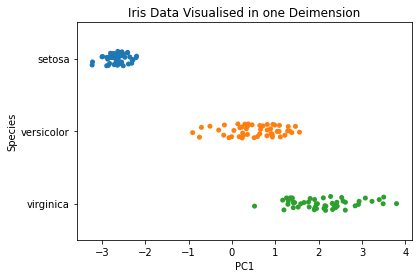

In [38]:
# code 
sns.stripplot(x='PC1',y='Species',data=df,jitter=True)
plt.title('Iris Data Visualised in one Deimension')

As you can see below, the setosa category can be entirely distinguished from the other two by this component. Although the other two species are mostly separable, they experience some significant overlap which could make classification difficult with PC1 alone.

#### Explaining more variance

Perhaps we want to be sure that our model is explaining 95% of the variance (instead of our current 92%). If a variance threshold is known, but the number of desired components is not, then we can set the n_components parameter to the percentage we desire. When the number of components is known, the n_components parameter can instead be set to the number of principal components desired.

In [40]:
precent_of_variance_explained = .95 

pca = PCA(n_components=precent_of_variance_explained)

pca_data=pca.fit_transform(X)

print("{} Principal Components are required to explain {} of the variation in this data.".format(pca.n_components_,precent_of_variance_explained))

2 Principal Components are required to explain 0.95 of the variation in this data.


## Q2: Principal Components are required to explain 0.95 of the variation in this data.? 

    A: 4
    B: 3
    C: 2
    D: 1

    assgin A,B,C or D to q2.

In [41]:
# Replace "X" with A,B,C or D
q2 = str("C")

In [42]:
'''
Please run this cell to to, submit your option for evalutaion
'''

file=open("submit1.txt","w+")

s1=q2
file.write(s1)
file.write("\n")
file.close()

#### Determing the right number of dimensions

We can attempt to confirm that '_' is a natural number of dimensions for our data by visualizing the relationship between the number of principal components and the variance explained.



[0.92461872 0.97768521 0.99478782 1.        ]


(0.0, 1.1)

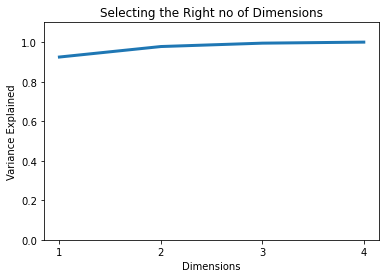

In [45]:
# Plot the graph for Selecting the right number of dimensions
# graph b/w Dimensions and Variance Explained
pca=PCA().fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
dim= np.arange(len(cumsum))+1

plt.plot(dim,cumsum,'-',lw=3);

plt.xlabel('Dimensions')
plt.ylabel('Variance Explained')
plt.title('Selecting the Right no of Dimensions')

plt.xticks([1,2,3,4])
plt.ylim([0,1.1])


#### Plotting the data in two dimensions
Thus we should consider plotting the data in two dimensions.

E:\MachineLearning\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Iris Data Visualised in Two Dimension')

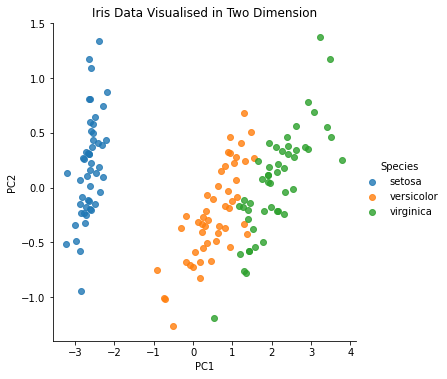

In [46]:
# Plot lmplot for PC1 and PC2 
sns.lmplot('PC1','PC2',data=df,hue='Species',fit_reg=False)
plt.title('Iris Data Visualised in Two Dimension')

## Q3 Is the data is nearly entireably separable with the first two principle components alone? 
    A: False 
    B: True
    
    Assgin A or B to q3.

In [47]:
# Replace "X" with A or B
q3 = str("B")

In [48]:
'''
Please run this cell to to, submit your option for evalutaion
'''

file=open("submit2.txt","w+")

s2=q3
file.write(s2)
file.write("\n")
file.close()